In [1]:
URL = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [3]:
medical_charges = pd.read_csv(URL)
medical_charges

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_charges.shape

(1338, 7)

In [6]:
medical_charges.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
medical_charges.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
medical_charges.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_charges,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age Visualization')

fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_charges,
                   x='bmi',
                   marginal='box',
                   title='Body Mass Index')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_charges,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_charges,
                   x='charges',
                   marginal='box',
                   color='sex',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig = px.histogram(medical_charges,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## Smoker

In [15]:
medical_charges.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
px.histogram(medical_charges, x='smoker', color='sex', title='Smoker v/s Gender')

In [27]:
fig = px.scatter(medical_charges, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [29]:
fig = px.scatter(medical_charges, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [32]:
px.violin(medical_charges, x='children', y='charges', title='Children v/s Charges')

In [33]:
px.violin(medical_charges, x='sex', y='charges', title='Gender v/s Charges')

In [34]:
px.violin(medical_charges, x='region', y='charges', title='Region v/s Charges')

In [35]:
px.violin(medical_charges, x='smoker', y='charges', title='Smoker v/s Charges')

## Correlation

In [36]:
medical_charges.charges.corr(medical_charges.age)

np.float64(0.2990081933306478)

In [37]:
medical_charges.charges.corr(medical_charges.bmi)

np.float64(0.19834096883362887)

In [39]:
medical_charges.charges.corr(medical_charges.children)

np.float64(0.06799822684790487)

In [38]:
smoker_values = {'no':0, 'yes':1}
medical_charges['smoker_numeric'] = medical_charges.smoker.map(smoker_values)
medical_charges.charges.corr(medical_charges.smoker_numeric)

np.float64(0.7872514304984778)

In [41]:
gender_values = {'female':1, 'male':0}
medical_charges['sex_numeric'] = medical_charges.sex.map(gender_values)

In [45]:
Corr = medical_charges[['age','sex_numeric','bmi','children', 'smoker_numeric','charges']].corr()
Corr

,age,sex_numeric,bmi,children,smoker_numeric,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex_numeric,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker_numeric,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

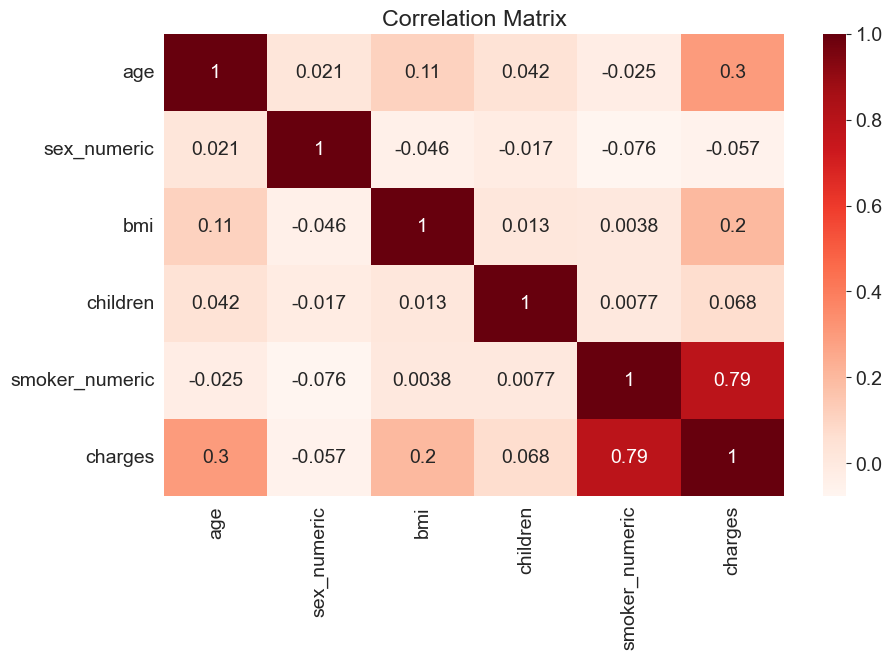

In [46]:
sns.heatmap(Corr,cmap='Reds', annot=True)
plt.title('Correlation Matrix')